In [ ]:
#Customer Transaction Analysis and Segmentation

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Load Data
df = pd.read_csv("/content/data.csv")

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#Exploring Dataset: Checking missing values, column types, and basic stats

In [ ]:
print(df.head())

           Transaction Date Customer Age Group  Transaction Amount  \
0  2024-01-04T18:30:00.000Z              26-40         4396.760017   
1  2024-01-02T18:30:00.000Z              26-40         4065.656698   
2  2024-03-10T18:30:00.000Z              18-25         3327.352219   
3  2025-07-05T18:30:00.000Z              26-40         1702.262769   
4  2023-01-03T18:30:00.000Z                41+          361.819728   

        Category  Reward Points Earned  Transaction Frequency Quarter No  
0         Travel                  61.0                    6.0         Q1  
1      Groceries                  89.0                    3.0         Q1  
2      Groceries                  31.0                    2.0         Q1  
3  Entertainment                  31.0                    1.0         Q3  
4      Groceries                  66.0                    8.0         Q1  


In [ ]:
print(df.shape)

(1007, 7)


In [ ]:
print(df.columns)

Index(['Transaction Date', 'Customer Age Group', 'Transaction Amount',
       'Category', 'Reward Points Earned', 'Transaction Frequency',
       'Quarter No'],
      dtype='object')


In [ ]:
#Check for Null Values
print(df.isnull().sum())

Transaction Date         0
Customer Age Group       0
Transaction Amount       2
Category                 5
Reward Points Earned     4
Transaction Frequency    1
Quarter No               0
dtype: int64


In [ ]:
def show_missing_data(df, columns):
    for col in columns:
        missing_data = df[pd.isnull(df[col])]
        if not missing_data.empty:
            print(f"\n Missing Data in '{col}' Column:")
            print(missing_data)
        else:
            print(f"\n No Missing Data in '{col}' Column.")

columns_to_check = ['Transaction Amount', 'Category', 'Reward Points Earned', 'Transaction Frequency']
show_missing_data(df, columns_to_check)


 Missing Data in 'Transaction Amount' Column:
             Transaction Date Customer Age Group  Transaction Amount  \
435  2023-09-10T18:30:00.000Z              26-40                 NaN   
607  2023-09-09T18:30:00.000Z              26-40                 NaN   

      Category  Reward Points Earned  Transaction Frequency Quarter No  
435  Groceries                  49.0                    5.0         Q3  
607  Groceries                  48.0                    7.0         Q3  

 Missing Data in 'Category' Column:
             Transaction Date Customer Age Group  Transaction Amount Category  \
381  2025-03-11T18:30:00.000Z              18-25          233.087588      NaN   
412  2025-06-04T18:30:00.000Z              26-40         1643.928409      NaN   
529  2023-07-05T18:30:00.000Z                41+          757.692290      NaN   
632  2024-04-23T18:30:00.000Z              26-40         2152.313496      NaN   
698  2025-02-02T18:30:00.000Z              26-40         3836.975342      N

In [ ]:
#Handling Missing Values

# Dropping rows where 'Transaction Amount' is missing
df.dropna(subset=['Transaction Amount'], inplace=True) #drop approach has been used as only 2 values were missing

In [ ]:
#Filling null values using median approach
df['Transaction Frequency'].fillna(df['Transaction Frequency'].median(), inplace=True) #missing value count is very low thus median imputation is used - robust to poentiall skewness

<ipython-input-13-d06751d9feaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Frequency'].fillna(df['Transaction Frequency'].median(), inplace=True) #missing value count is very low thus median imputation is used - robust to poentiall skewness


In [ ]:
#Filling Null Values using mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True) #mode is used as it is categorical data

<ipython-input-14-a47fc783bc08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0], inplace=True) #mode is used as it is categorical data


In [ ]:
#deciding the approach to handle null value in Reward Points Earned Column
df['Reward Points Earned'].describe()

,Reward Points Earned
count,1001.000000
mean,49.338661
std,28.631490
min,1.000000
25%,25.000000
50%,48.000000
75%,74.000000
max,99.000000


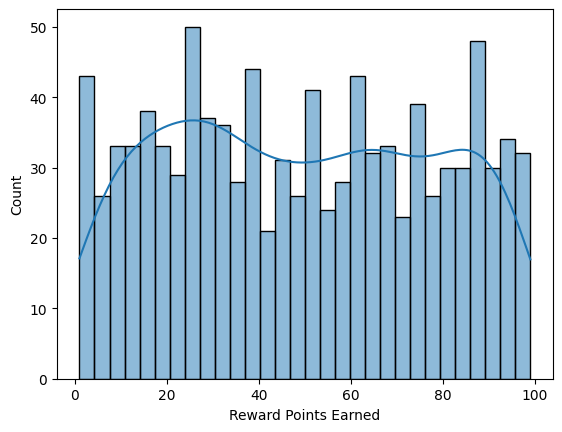

In [ ]:
sns.histplot(df['Reward Points Earned'], bins =30, kde=True)
plt.show()
#distribution check for skewness

In [ ]:
## plots show : Almost Uniform Distribution, No Extreme Skewness and No Sharp Outliers.
df['Reward Points Earned'].fillna(df['Reward Points Earned'].mean(), inplace = True) #mean imptation is used

<ipython-input-17-c8cba66aaa81>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reward Points Earned'].fillna(df['Reward Points Earned'].mean(), inplace = True) #mean imptation is used


In [ ]:
#Checking for Duplicates
duplicates = df[df.duplicated()]
df.duplicated().sum()

np.int64(6)

In [ ]:
#DATA VISUALIZATION

In [ ]:
age_order = ['18-25', '26-40', '41+']

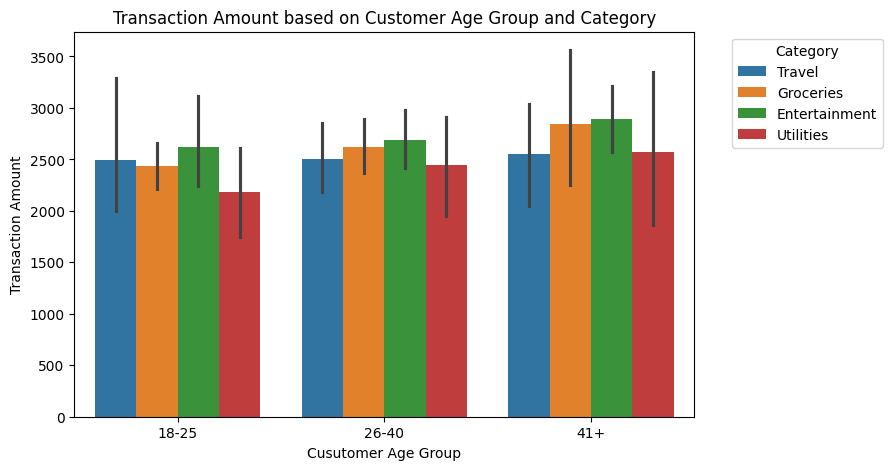

In [ ]:
#Visualizing Transaction Amount spent by different age groups on different category
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Customer Age Group', y='Transaction Amount', hue='Category', order=age_order)
plt.title('Transaction Amount based on Customer Age Group and Category')
plt.xlabel('Cusutomer Age Group')
plt.ylabel('Transaction Amount')
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The bar plot shows that the Age Group: 18 - 25 spends the maximum amount on Entertainment Category

Age Group: 26-40 spends maximum amount on Entertainment Category

Age Group: 41+ also spends the most on Entertainment Category

<ipython-input-22-9f188db78097>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


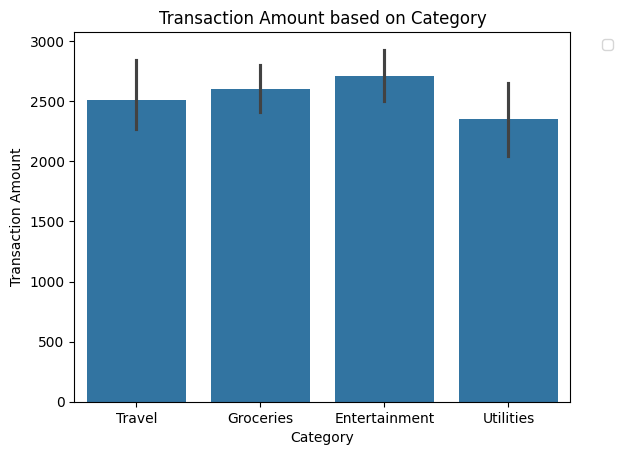

In [ ]:
sns.barplot(data=df, x='Category', y='Transaction Amount')
plt.title('Transaction Amount based on Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

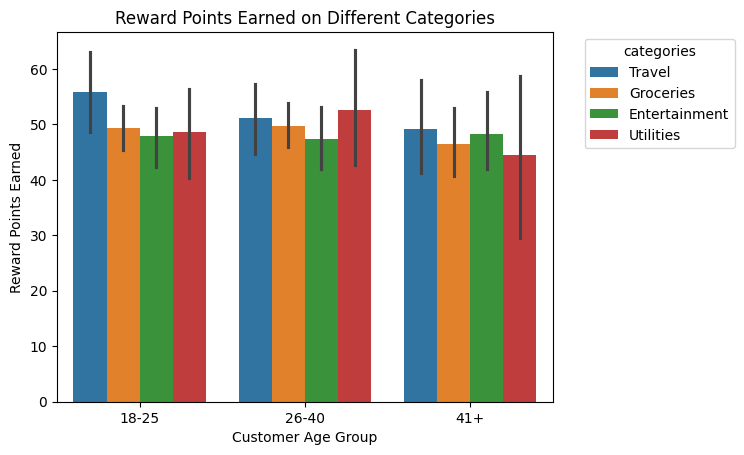

In [ ]:
#Visualizing Reward Points Earned by different Age Groups on differet Category
sns.barplot(data=df, x='Customer Age Group', y='Reward Points Earned', hue='Category', order=age_order)
plt.title('Reward Points Earned on Different Categories')
plt.legend(title='categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Customer Age Group')
plt.ylabel('Reward Points Earned')
plt.show()

Maximum reward Points are generated in the Travel Category across 18-25 and 41+ age groups, however the age group of 26-40 generate slightly higher rewards in the Utilities Section.

There can be seen a decline of rewards in the age group of 41+, the younger age group gets the maximum reward points.

<ipython-input-24-3df8ca4f7b89>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


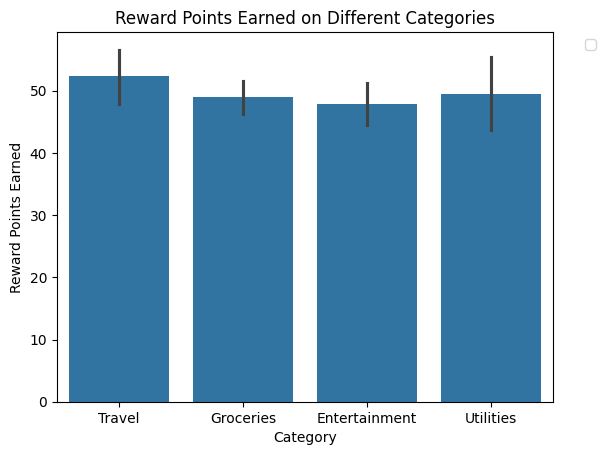

In [ ]:
sns.barplot(data=df, x='Category', y='Reward Points Earned')
plt.title('Reward Points Earned on Different Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Category')
plt.ylabel('Reward Points Earned')
plt.show()

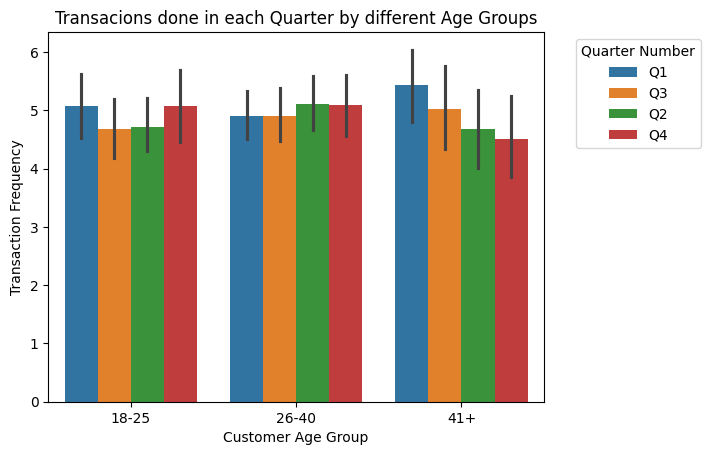

In [ ]:
#Visualizing Transaction Frequency based on Age Group and Quarter Number
sns.barplot(data=df, x='Customer Age Group', y='Transaction Frequency', hue='Quarter No', order = age_order)
plt.legend(title='Quarter Number', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Customer Age Group')
plt.ylabel('Transaction Frequency')
plt.title('Transacions done in each Quarter by different Age Groups')
plt.show()

Maximum number of transactioncs done can be seen in Q1 by age group of 18-25, in Q2 by age group of 26-40, and in Q1 again by age group of 41+

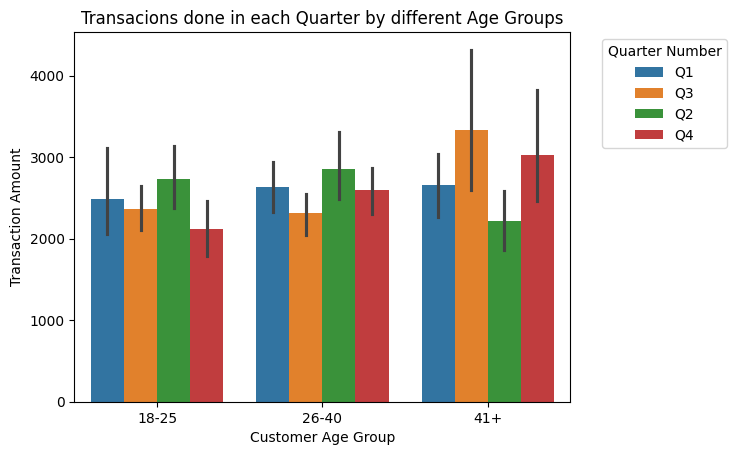

In [ ]:
#Visualizing Transaction Amount based on each quarter and age group
sns.barplot(data=df, x='Customer Age Group', y='Transaction Amount', hue='Quarter No', order = age_order)
plt.legend(title='Quarter Number', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Customer Age Group')
plt.ylabel('Transaction Amount')
plt.title('Transacions done in each Quarter by different Age Groups')
plt.show()

This barplot shows the maximum spending(amount) done by each age group in different quarters.

We can see that maximum transactions were done in Q1 by age groups 18-25 and 41+ but their most spending is done in quarter 2 and quarter 3 respectively.

The age group of 26-40 did maximum transactions in Q2 and they can be seen spending the most as well in Q2 only.

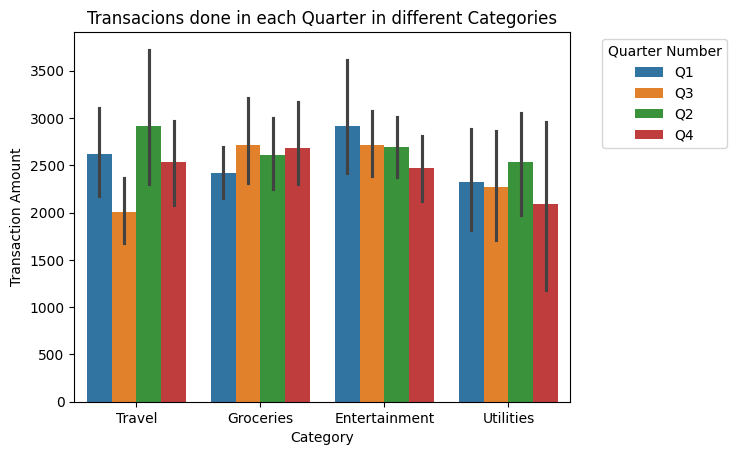

In [ ]:
#Visualizing transaction Amount based on Category and Quarter Number
sns.barplot(data=df, x='Category', y='Transaction Amount', hue='Quarter No')
plt.legend(title='Quarter Number', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.title('Transacions done in each Quarter in different Categories')
plt.show()

The graph shows that maximum expenditure is done on Travel Category in Q2,this can showcases the travel trend during the summer break season or the mid season.

Groceries however see almost same expenditure through the four quarters with a slight rise in Q3, which could be because of the festival season falling in quarter 3.

Entertainment shows a rise in Q1, which can be linked with the New Year season, and the winter breaks happening during that time.

Utilities shows the maximum spend happening during the Q2 and the least happening in Q4.

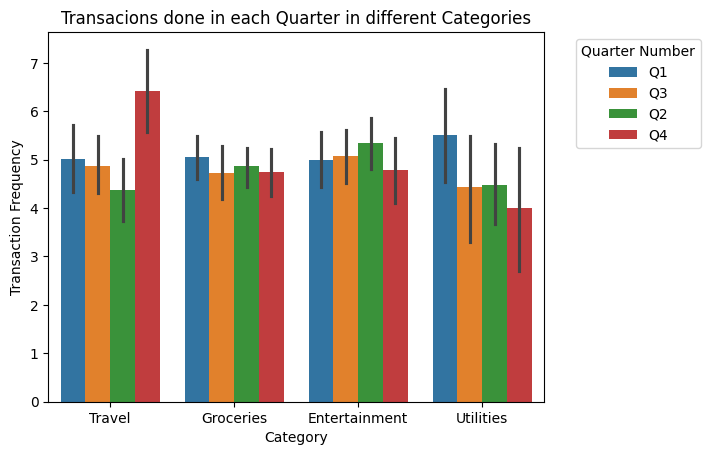

In [ ]:
#Visalizing Transaction Frequency of each Quarter based on Category
sns.barplot(data=df, x='Category', y='Transaction Frequency', hue='Quarter No')
plt.legend(title='Quarter Number', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Category')
plt.ylabel('Transaction Frequency')
plt.title('Transacions done in each Quarter in different Categories')
plt.show()

This shows maximum transactions happening in Q4 for Travel, Groceries and Entertainment sees a similar number of transactions happening throughout. Whereas, an incrase in number of transactions can be seen in Utilities during Q1 showcasing people having transactions on necessary items during the start of the year.

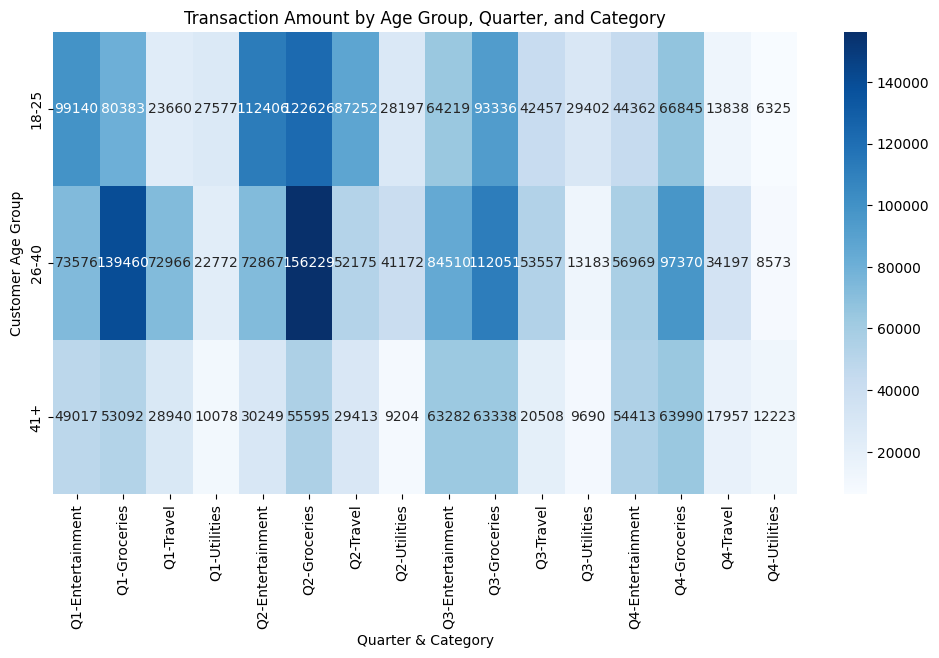

In [ ]:
#Heatmap
# Group the data to get total transactions per quarter, category, and age group
heatmap_data = df.pivot_table(values='Transaction Amount', index=['Customer Age Group'], columns=['Quarter No', 'Category'], aggfunc='sum')

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".0f")

plt.title("Transaction Amount by Age Group, Quarter, and Category")
plt.xlabel("Quarter & Category")
plt.ylabel("Customer Age Group")

plt.show()

In [ ]:
## MONTHLY TREND ANALYSIS

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.set_index('Transaction Date', inplace = True)

<ipython-input-32-28e524609182>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Transaction Amount'].sum().plot(kind='line', marker='o', color='b')


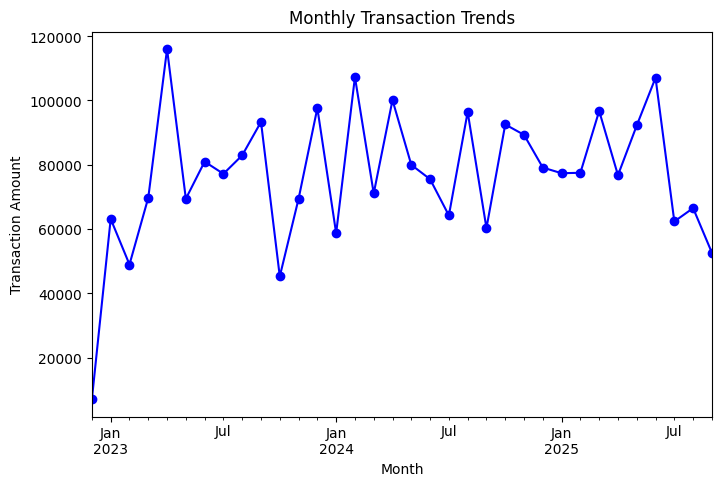

In [ ]:
# Monthly Transaction Trend Based on Transaction Amount
plt.figure(figsize=(8,5))
df.resample('M')['Transaction Amount'].sum().plot(kind='line', marker='o', color='b')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-33-8ca3ca307a67>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(freq='M'), 'Category'])['Transaction Amount'].sum().unstack().plot(kind='line', marker='o')


<Figure size 1200x600 with 0 Axes>

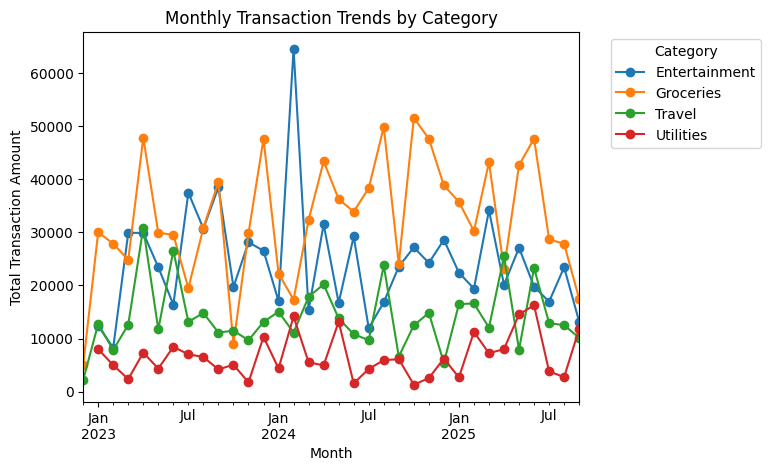

In [ ]:
#Trend Analysis based on Category
plt.figure(figsize=(12, 6))
df.groupby([pd.Grouper(freq='M'), 'Category'])['Transaction Amount'].sum().unstack().plot(kind='line', marker='o')
plt.title("Monthly Transaction Trends by Category")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-34-d7256143f5e5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(freq='M'), 'Customer Age Group'])['Transaction Amount'].sum().unstack().plot(kind='line', marker='o')


<Figure size 1200x600 with 0 Axes>

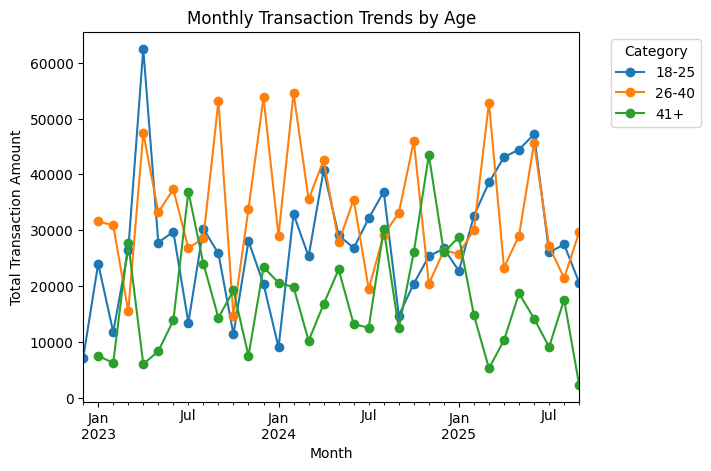

In [ ]:
#Trend Analysis by Age Group
plt.figure(figsize=(12, 6))
df.groupby([pd.Grouper(freq='M'), 'Customer Age Group'])['Transaction Amount'].sum().unstack().plot(kind='line', marker='o')
plt.title("Monthly Transaction Trends by Age")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analysis:

Monthly Transaction Trends-
- an increasing trend from January 2023 to mid-2024, followed by fluctuations can be seen
- There are periodic spikes and dips, suggesting seasonal trends or external factors affecting transactions.
- The highest transactions occur in mid-2024 and mid-2025, possibly indicating peak sales periods or promotional events.
- The downward spikes suggest occasional drops in spending, possibly due to low demand periods or external market conditions.

Monthly Transaction Trends by Category-
- Different transaction categories exhibit varied trends over time.
- Categories 0 and 1 have the highest transaction volumes, suggesting they are the most popular.
- Categories 2 and 3 have consistently lower transactions, which might indicate niche or less frequently used products/services.
- There is a general cyclic pattern, indicating seasonal effects on different categories.

Monthly Transaction Trends by Age Group-
- Different age groups have distinct spending behaviors.
- Age Group 1 and 0 show high and frequent fluctuations, indicating they contribute the most to total transactions.
- Age Group 2 has significantly lower transaction volumes, suggesting lower purchasing power or lesser engagement.
- The cyclic variations indicate that certain age groups may be more active during specific months, possibly influenced by holidays, sales, or income cycles.

Key Insights
- There are seasonal variations in transactions, with peak periods indicating possible high sales events.
- Specific categories and age groups dominate the transactions

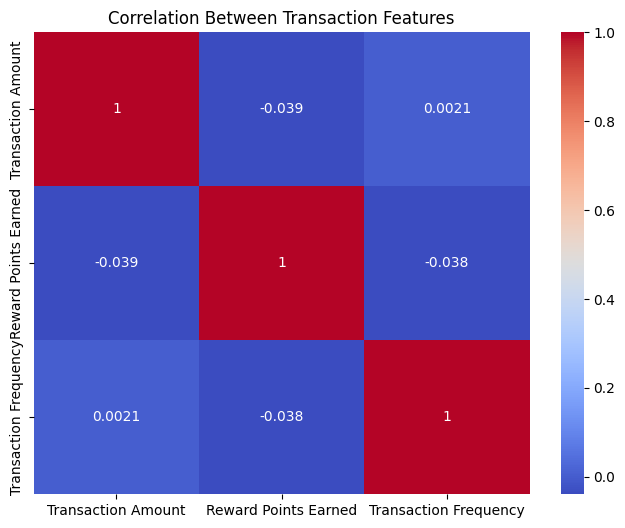

In [ ]:
##Visualizing Correlation among different features
plt.figure(figsize=(8,6))
sns.heatmap(df[['Transaction Amount', 'Reward Points Earned', 'Transaction Frequency']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Transaction Features")
plt.show()

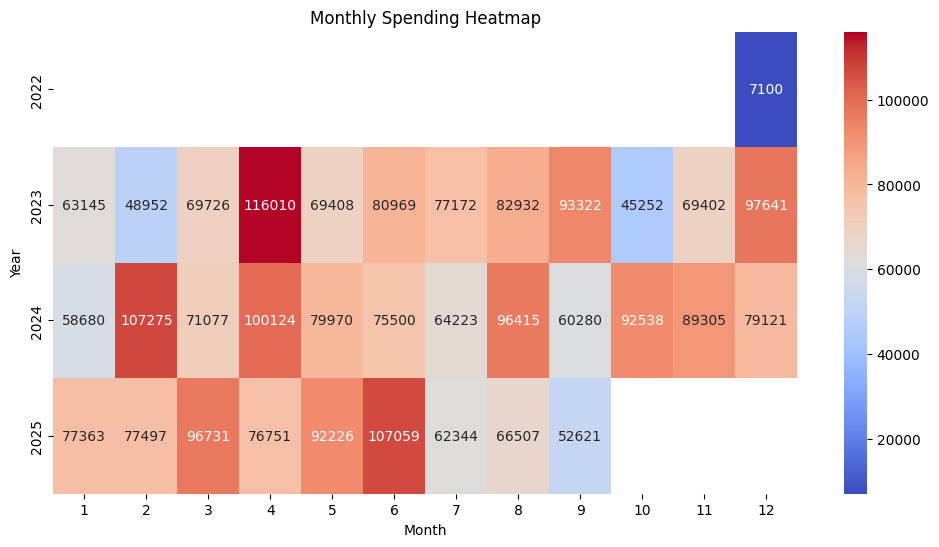

In [ ]:
#correlation - montly spending
df['Month'] = df.index.month
df['Year'] = df.index.year

monthly_spending = df.groupby(['Year', 'Month'])['Transaction Amount'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_spending, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Monthly Spending Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [ ]:
#OUTLIER DETECTION
##IQR
Q1 = df['Transaction Amount'].quantile(0.25)
Q3 = df['Transaction Amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Transaction Amount'] < lower_bound) | (df['Transaction Amount'] > upper_bound) ]
print(outliers)

                          Customer Age Group  Transaction Amount  \
Transaction Date                                                   
2023-04-14 18:30:00+00:00              18-25        21086.335890   
2025-02-07 18:30:00+00:00              26-40         9193.529984   
2024-02-26 18:30:00+00:00              18-25        23900.125550   
2024-11-19 18:30:00+00:00                41+        18115.938470   
2024-08-06 18:30:00+00:00                41+        22284.096220   
2023-04-08 18:30:00+00:00              26-40        19933.659300   

                                Category  Reward Points Earned  \
Transaction Date                                                 
2023-04-14 18:30:00+00:00         Travel                  10.0   
2025-02-07 18:30:00+00:00         Travel                  13.0   
2024-02-26 18:30:00+00:00  Entertainment                  43.0   
2024-11-19 18:30:00+00:00      Groceries                  24.0   
2024-08-06 18:30:00+00:00      Groceries                  2

In [ ]:
print(outliers.shape)

(6, 8)


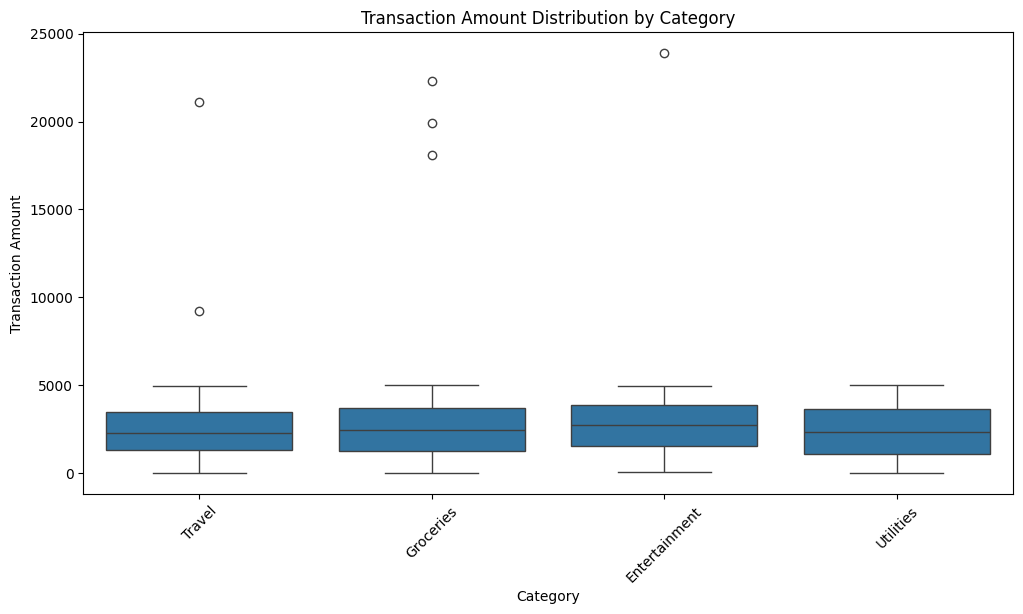

In [ ]:
#Visualizing Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Transaction Amount", data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Transaction Amount Distribution by Category")
plt.show()

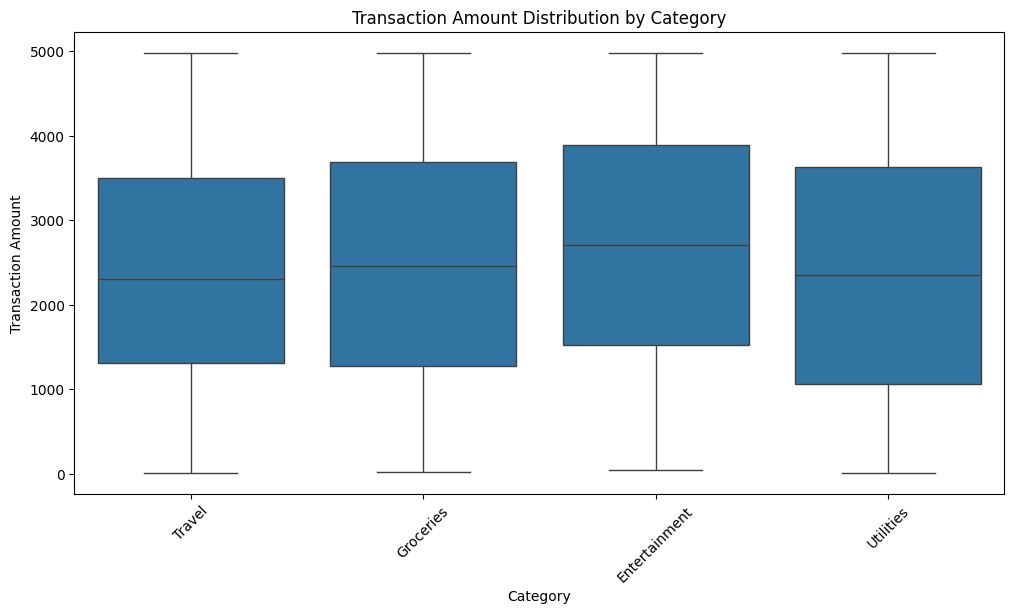

In [ ]:
#treating outliers
##capping 99th percentile

cap_value = df['Transaction Amount'].quantile(0.99)
df['Transaction Amount'] = df['Transaction Amount'].apply(lambda x: min(x, cap_value))

plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Transaction Amount", data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Transaction Amount Distribution by Category")
plt.show()

Outliers are capped(replaced) using th 99th quantile, this is done as it preserves most of the data while handling extreme values.

Reduces Skewnness without completely removing the high transactions

In [ ]:
#Label Encoding
# changing categorical data into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['Customer Age Group', 'Category', 'Quarter No']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Label Encoder is used to convert the object data type of columns into numerical data type. This is done to prepare the data fr further process such as : Customer Segmentation, Machine Learning Model Prepration and other.

In [ ]:
##Customer Segmentation - KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df[['Transaction Amount', 'Reward Points Earned', 'Transaction Frequency']]

features = scaler.fit_transform(features)

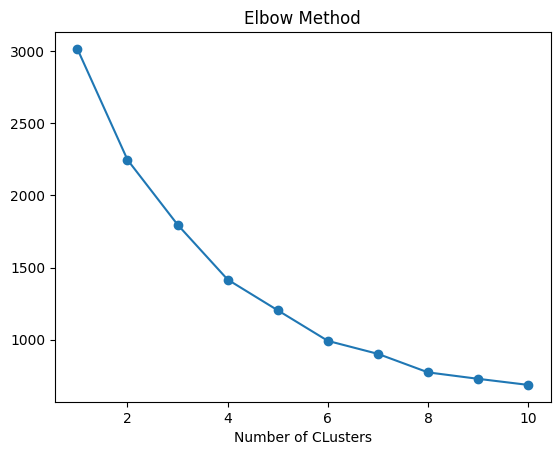

In [ ]:
#elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit_transform(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of CLusters")
plt.show()

Elbow method is used to determine the number of clusters, The "elbow" (where the curve bends) seems to be at K = 4 or K = 5, Taking k = 5 as the cluster number.  

In [ ]:
k = 5
kmean = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Customer Segments'] = kmean.fit_predict(features)

A new columns Customer Segment is formed containing prediction of the K Means model on feature columns.

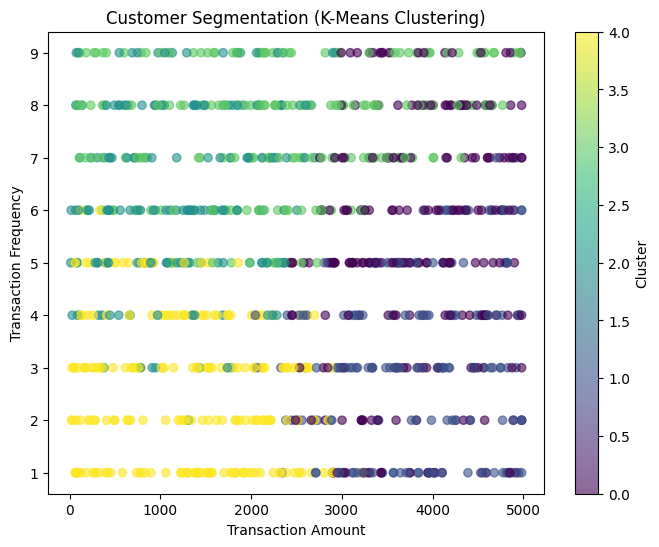

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Transaction Amount'],df['Transaction Frequency'], c=df['Customer Segments'], cmap='viridis', alpha=0.6)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")
plt.colorbar(label='Cluster')
plt.show()

Insights:
- Higher transaction amounts tend to have varied frequencies.
- Some clusters (e.g., yellow) show frequent transactions with higher amounts.
- Lower transaction amounts are more distributed across clusters.

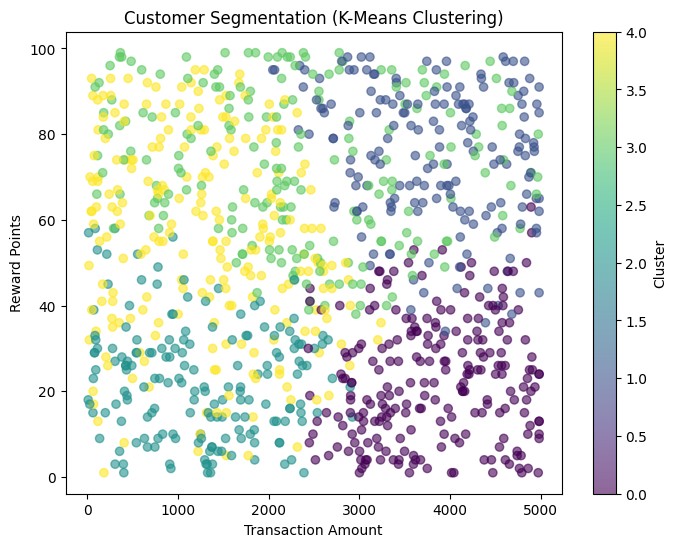

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Transaction Amount'],df['Reward Points Earned'], c=df['Customer Segments'], cmap='viridis', alpha=0.6)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Transaction Amount")
plt.ylabel("Reward Points")
plt.colorbar(label='Cluster')
plt.show()

Insights:
- Higher transaction amounts generally lead to more reward points.
- Certain clusters (yellow, green) indicate a high correlation between spending and reward accumulation.
- A few clusters (purple) have high transaction amounts but relatively low reward points.

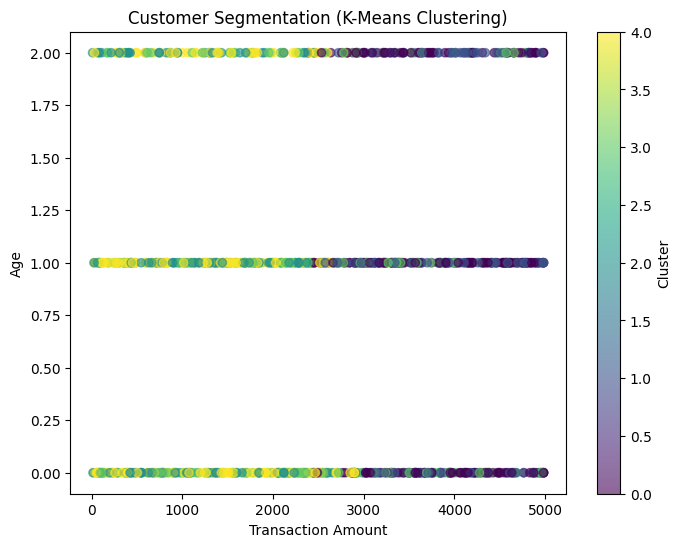

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Transaction Amount'],df['Customer Age Group'], c=df['Customer Segments'], cmap='viridis', alpha=0.6)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Transaction Amount")
plt.ylabel("Age")
plt.colorbar(label='Cluster')
plt.show()

Insights:
- Different age groups have distinct spending patterns.
- Certain clusters (yellow, green) indicate specific age groups spending more.
- A strong cluster distinction suggests transaction behavior varies significantly by age.